# Heart Disease Prediction

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot

import cufflinks as cf 


In [2]:
pyo.init_notebook_mode(connected = True) ## configuring plotly
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

### Load Dataset

In [3]:
f1 = pd.read_csv("values.csv")
f1.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
f2= pd.read_csv("labels.csv")

del f2['patient_id']
f2.head()


,heart_disease_present
0,0
1,0
2,1
3,1
4,0


In [5]:
df= pd.concat([f1,f2], axis=1)

In [6]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [7]:
df['thal'].unique() ##Checking for the labels in the categorical parameters 

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [8]:
df['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [9]:
df['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [10]:
df['num_major_vessels'].unique()

array([0, 3, 2, 1], dtype=int64)

### Info Of Dataset

## Column Definition

1. patient_id: Patient ID
2. slope_of_peak_exercise_st_segment: Slope of the peak exercise ST segment (Ordinal) (Value 1: up sloping , Value 2: flat, Value 3: down sloping )
3. thal : It is a discrete data type that shows us Thalassemia. Values are normal , fixed defect, reversible defect.
4. resting_blood_pressure: resting blood pressure
5. chest_pain_type: chest pain type (4 values -Ordinal):Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic 
6. num_major_vessels: number of major vessels (0–3, Ordinal) colored by fluoroscopy
7. fasting_blood_sugar_gt_120_mg_per_dl: fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)
8. resting_ekg_results: resting electrocardiography results(values 0,1,2)
9. serum_cholesterol_mg_per_dl: serum cholesterol in mg/dl 
10. oldpeak_eq_st_depression: ST depression induced by exercise relative to rest 
11. sex: 1= Male, 0= Female (Binary)
12. age: age
13. max_heart_rate_achieved:  maximum heart rate achieved
14. exercise_induced_angina: exercise induced angina (binary) (1 = yes; 0 = no)
15. heart_disease_present: heart disease present or not (binary) (1 = yes; 0 = no)


In [11]:
df['heart_disease_present']

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [12]:
df.groupby('heart_disease_present').size()
## put all the 1s in a group and 0s in another group

heart_disease_present
0    100
1     80
dtype: int64

In [13]:
df.shape

(180, 15)

In [14]:
df.size ## (180*15)

2700

In [15]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [16]:
df.info()
## checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

## Visualisation

<AxesSubplot:>

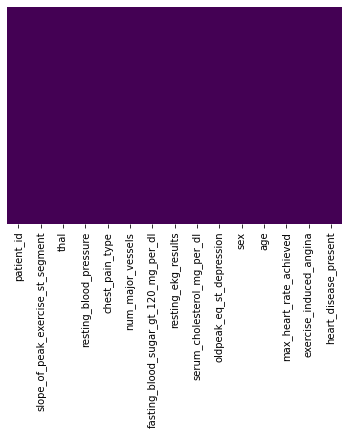

In [17]:
sns.heatmap(df.isnull(), yticklabels= False,cbar= False, cmap= 'viridis')

- No null values present in the above dataset


<AxesSubplot:xlabel='heart_disease_present', ylabel='count'>

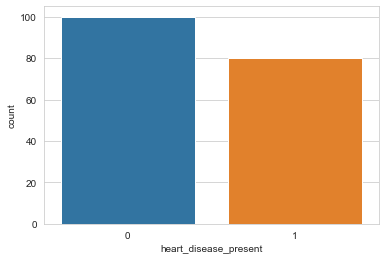

In [18]:
sns.set_style('whitegrid')
sns.countplot(x= 'heart_disease_present', data= df)

- Around 100 people are not having heart diseases
- And 80 people are having heart diseases in the given dataset

<AxesSubplot:xlabel='heart_disease_present', ylabel='count'>

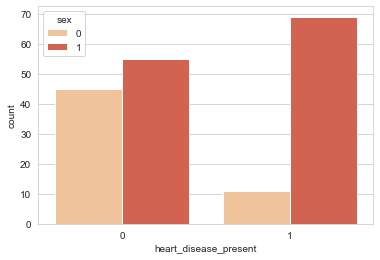

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='heart_disease_present', hue='sex', data=df, palette='OrRd')

## Heart disease not present
- Around 45 females don't have heart disease
- Around 55 males don't have heart disease

## Heart disease present
- Around 10 females have heart disease
- Around 68 males have heart disease

<AxesSubplot:xlabel='heart_disease_present', ylabel='count'>

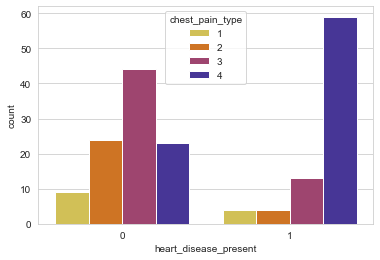

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='heart_disease_present', hue='chest_pain_type', data=df, palette='CMRmap_r')

- From the above graph we can understand that there is high chance of getting a heart disease if the chest pain type is 4. That is even if it is asymptomatic.

<AxesSubplot:>

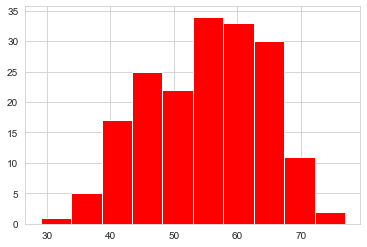

In [21]:
df['age'].hist(bins=10, color= 'red')

<AxesSubplot:>

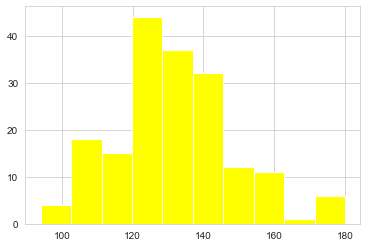

In [22]:
df['resting_blood_pressure'].hist(bins=10, color= 'yellow')

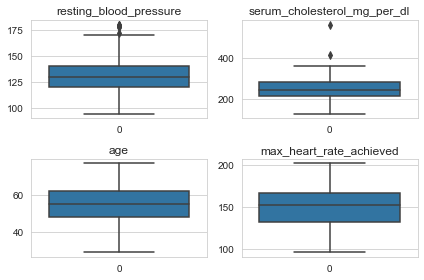

In [23]:
## Checking For Ouliers
fig, axes = plt.subplots(2, 2)
sns.boxplot(data=df['resting_blood_pressure'],ax=axes[0,0]).set(title='resting_blood_pressure')
sns.boxplot(data=df['serum_cholesterol_mg_per_dl'], ax=axes[0,1]).set(title='serum_cholesterol_mg_per_dl')
sns.boxplot(data=df['age'], ax=axes[1,0]).set(title='age')
sns.boxplot(data=df['max_heart_rate_achieved'], ax=axes[1,1]).set(title='max_heart_rate_achieved')
fig.tight_layout()
plt.show()

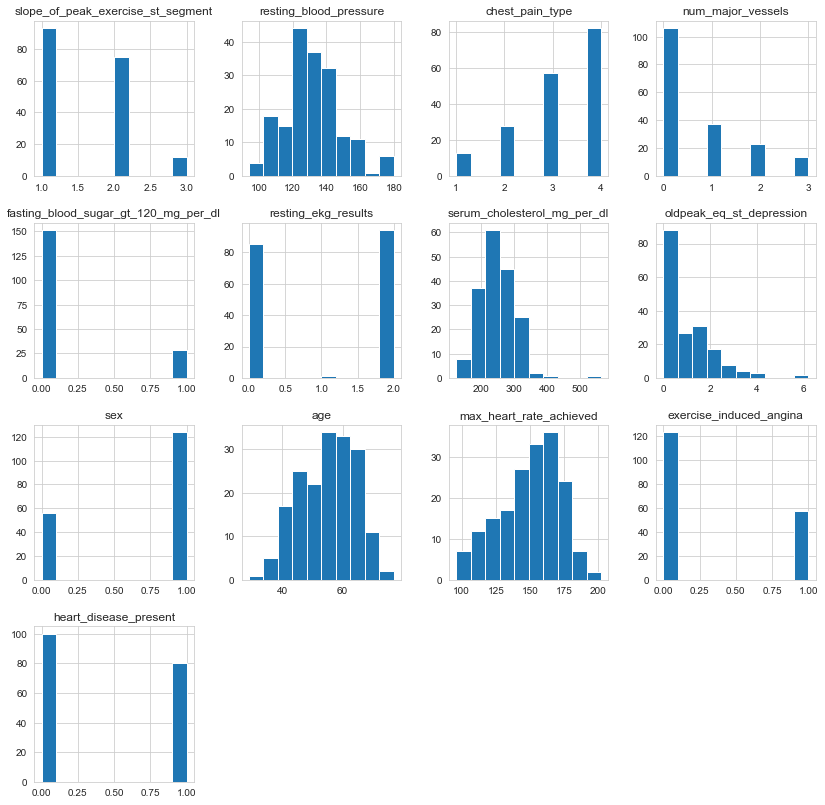

In [24]:
df.hist(figsize=(14,14))
plt.show()

C:\Users\Anirudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



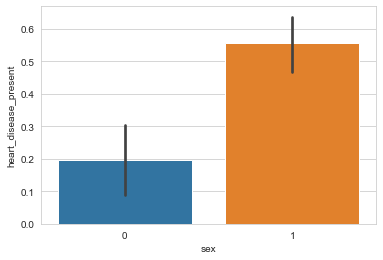

In [25]:
sns.barplot(df['sex'],df['heart_disease_present'])
plt.show()

C:\Users\Anirudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



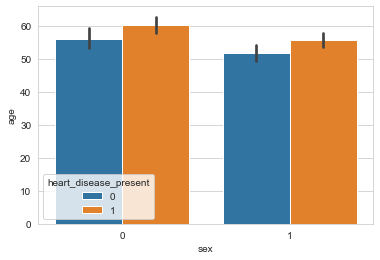

In [26]:
sns.barplot(df['sex'], df['age'], hue=df['heart_disease_present'])
plt.show()

### Observation
- Female of age till 55, heart disease not present. But heart disease are present in them from age 60.
- Male of age till 50, heart disease not present. But heart disease are present in them from age 55.

C:\Users\Anirudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='chest_pain_type', ylabel='heart_disease_present'>

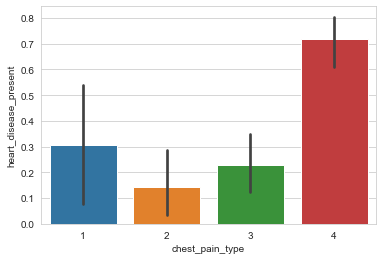

In [27]:
sns.barplot(df['chest_pain_type'], df['heart_disease_present'])

## Observation
- The probability of getting a heart disease is more among people having Chest Pain Type 4 

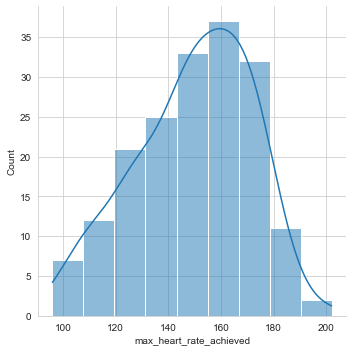

In [28]:
sns.displot(df['max_heart_rate_achieved'],kde= True)


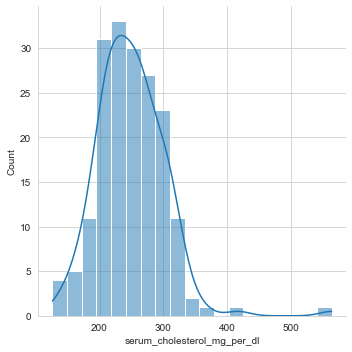

In [29]:
sns.displot(df['serum_cholesterol_mg_per_dl'],kde= True)

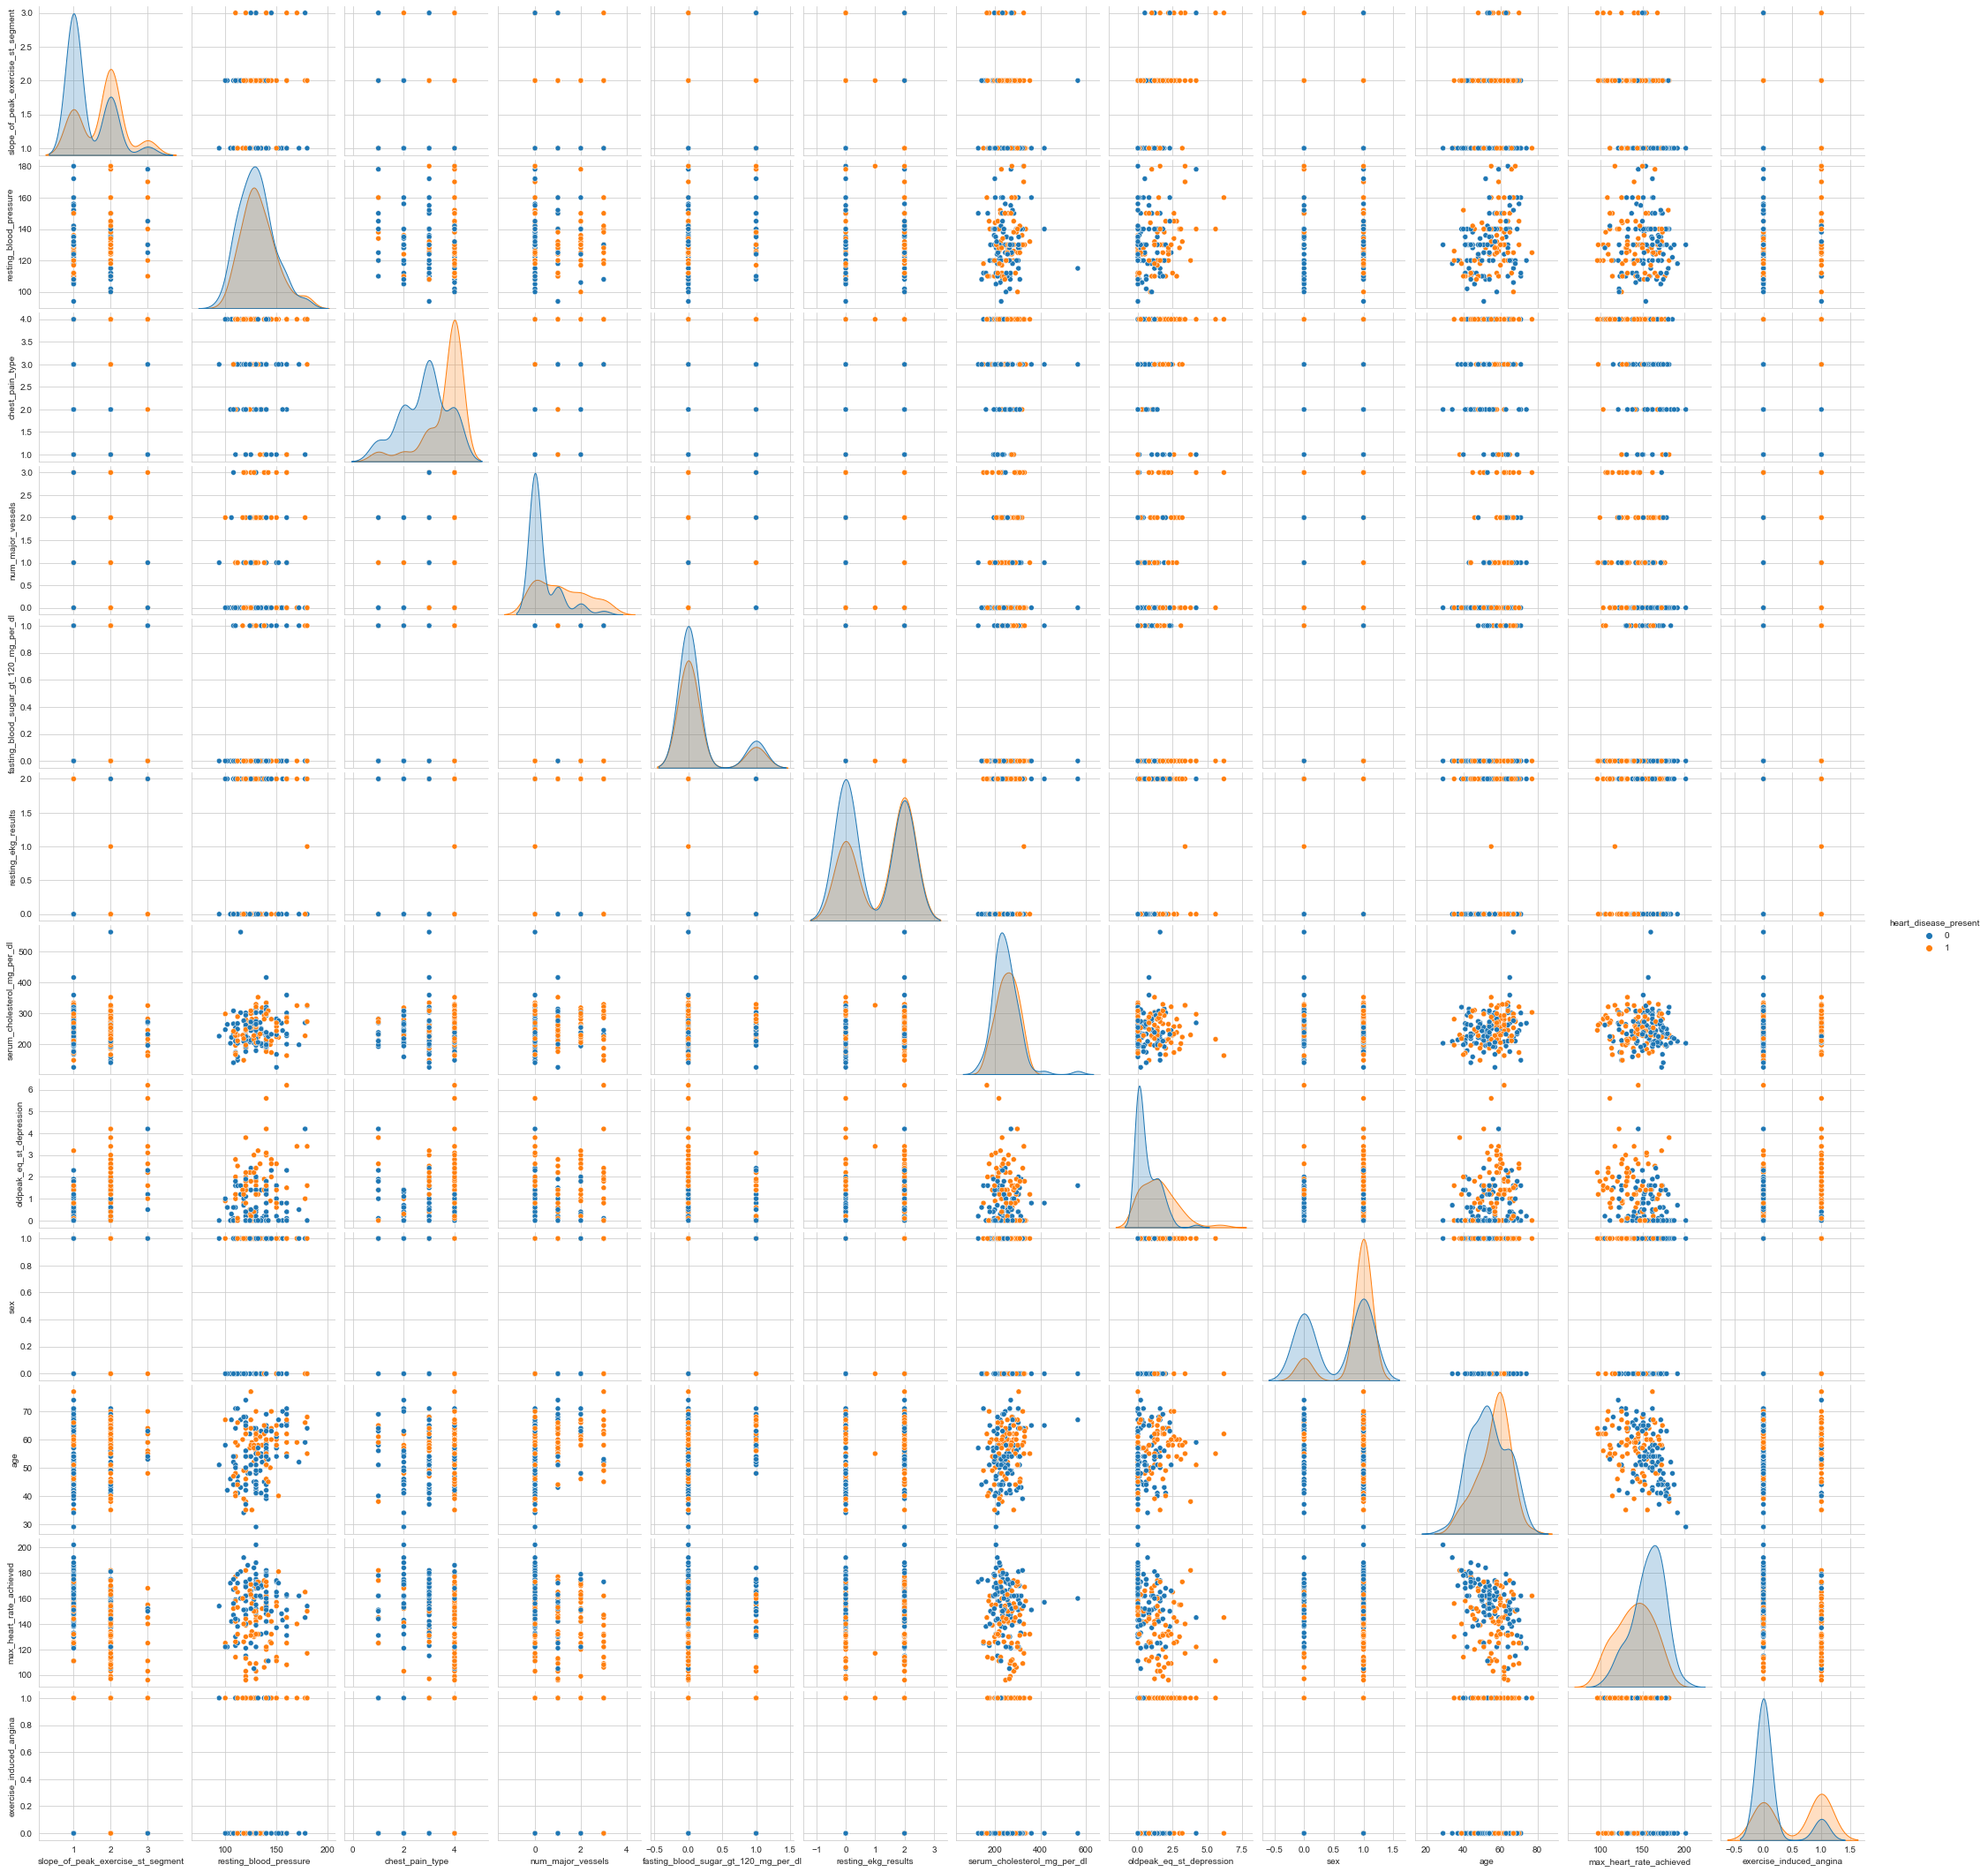

In [30]:
sns.pairplot(df, hue='heart_disease_present')

In [31]:
numeric_columns=['resting_blood_pressure','serum_cholesterol_mg_per_dl','age','oldpeak_eq_st_depression','max_heart_rate_achieved']

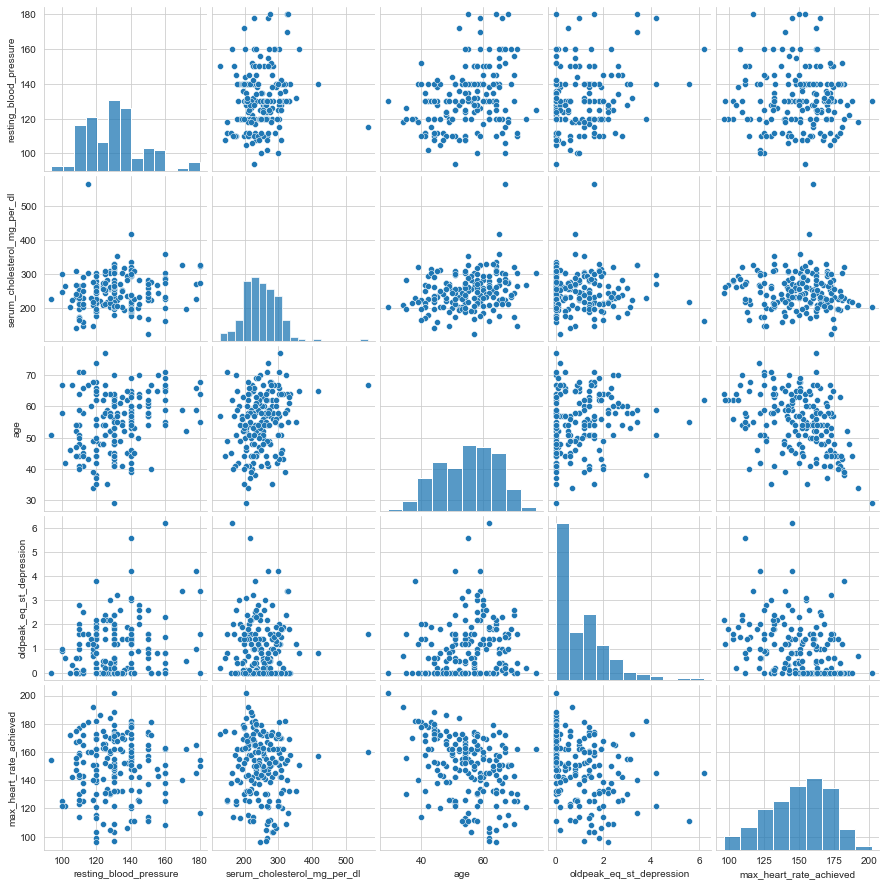

In [32]:
sns.pairplot(df[numeric_columns])

C:\Users\Anirudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



0    100
1     80
Name: heart_disease_present, dtype: int64


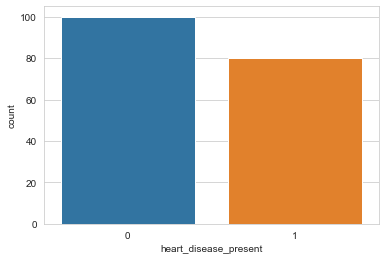

In [33]:
y= df['heart_disease_present']
sns.countplot(y)
target_temp= y.value_counts()
print(target_temp)

In [34]:
px.bar(df,df['sex'], df['heart_disease_present'])

In [35]:
## heatmap creation
## numerical values are not binary values like 0 or 1. It is columns like cholestrol, blood-pressure will come under this
numeric_columns=['resting_blood_pressure','serum_cholesterol_mg_per_dl','age','oldpeak_eq_st_depression','max_heart_rate_achieved']

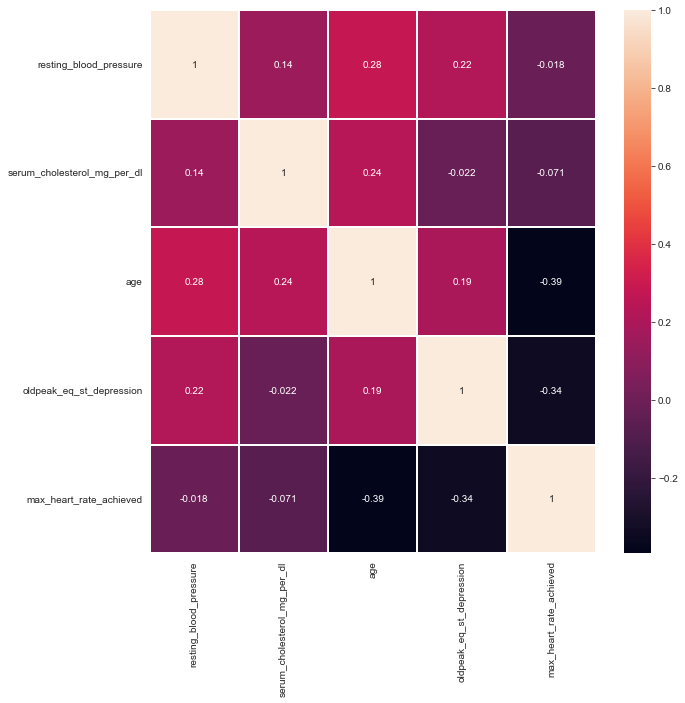

In [36]:
sns.heatmap(df[numeric_columns].corr(),annot= True, linewidths= 0.1)
fig= plt.gcf() 
fig.set_size_inches(10,10)
plt.show()

Text(0.5, 1.0, 'Age of patients with Heart Disease')

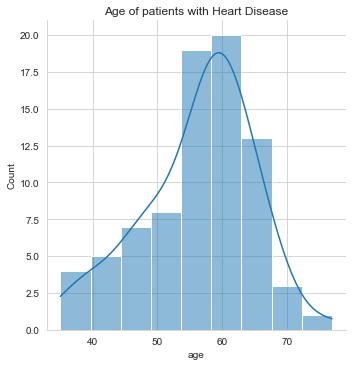

In [37]:
sns.displot(df[df['heart_disease_present']==1].age, kde=True)
plt.title('Age of patients with Heart Disease')

### Observation
- People having heart disease are more in the category of 55-65

Text(0.5, 1.0, 'Max heart rate of patients with Heart Disease')

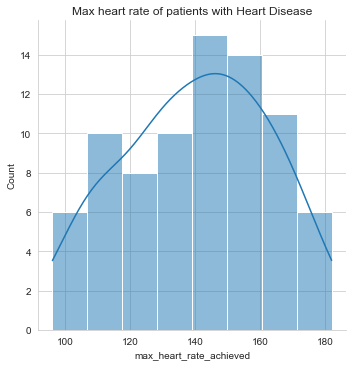

In [38]:
sns.displot(df[df['heart_disease_present']==1].max_heart_rate_achieved, kde=True)
plt.title('Max heart rate of patients with Heart Disease')

### Observation
- People with heart disease are more in the 'max_heart_rate' range of 140-160

<AxesSubplot:xlabel='heart_disease_present', ylabel='max_heart_rate_achieved'>

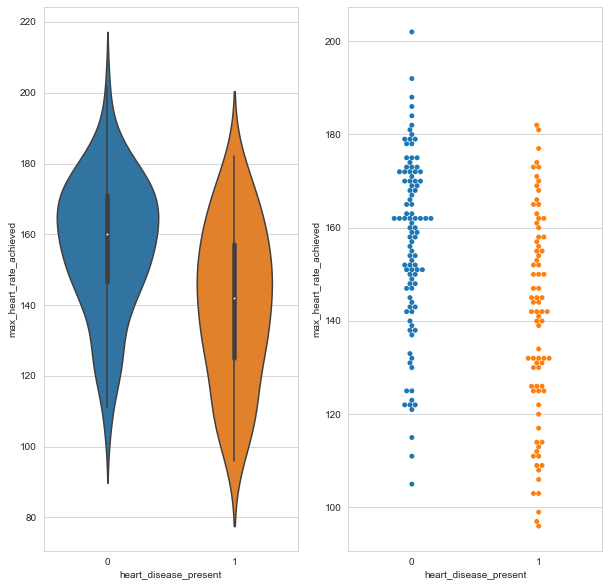

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
sns.violinplot(ax=axes[0], data=df, x='heart_disease_present', y="max_heart_rate_achieved")

sns.swarmplot(ax=axes[1], data=df, x='heart_disease_present', y="max_heart_rate_achieved" )


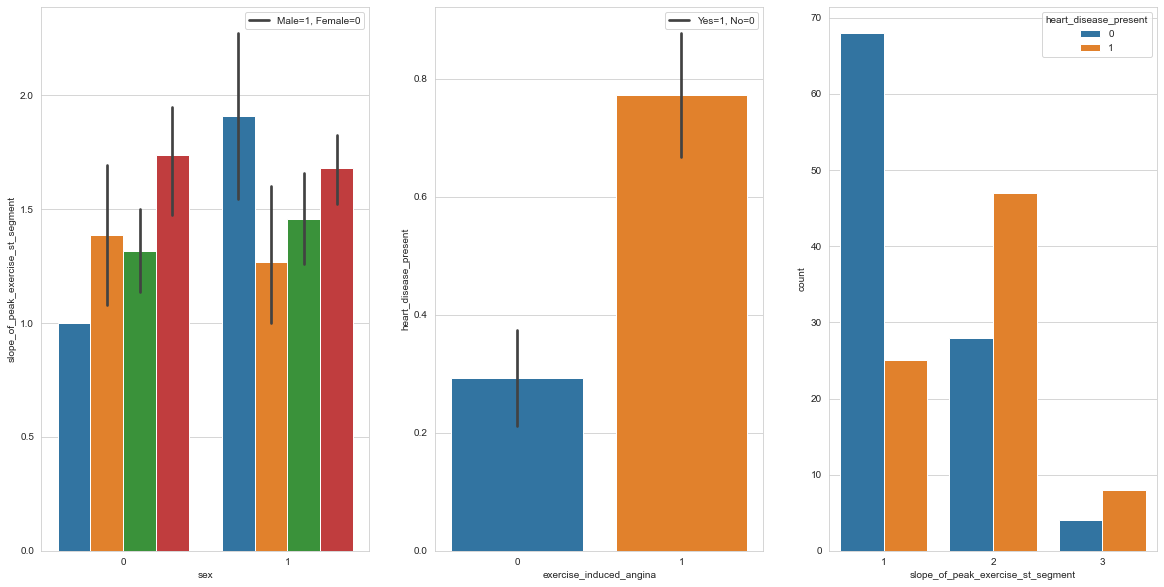

In [40]:
plt.figure(figsize=(20,10))
plt.subplot(131)
sns.barplot(x="sex", y="slope_of_peak_exercise_st_segment", hue='chest_pain_type', data=df)
plt.legend(['Male=1, Female=0'])

plt.subplot(132)
sns.barplot(x='exercise_induced_angina', y='heart_disease_present', data=df)
plt.legend(['Yes=1, No=0'])

plt.subplot(133)
sns.countplot(x='slope_of_peak_exercise_st_segment', hue='heart_disease_present', data=df)
plt.show()

### Data Preprocessing

In [41]:
one_hot_encoded_data= pd.get_dummies(df, columns = ['thal'])

one_hot_encoded_data.head()


,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect
0,0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1


In [42]:
df2= one_hot_encoded_data
df2

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect
0,0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,125,4,2,1,0,254,0.2,1,67,163,0,1,0,0,1
176,2s2b1f,2,180,4,0,0,1,327,3.4,0,55,117,1,1,0,1,0
177,nsd00i,2,125,3,0,0,0,309,1.8,1,64,131,1,1,0,0,1
178,0xw93k,1,124,3,2,1,0,255,0.0,1,48,175,0,0,0,1,0


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [44]:
##Changing the order of columns
df2= df2.iloc[: , [0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,13]]
df2.head(10)

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_fixed_defect,thal_normal,thal_reversible_defect,heart_disease_present
0,0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0,0
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0,0
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,0,1,0,1
3,l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,0,0,1,1
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1,0
5,ldukkw,1,130,3,0,0,0,180,0.0,1,42,150,0,0,1,0,0
6,2gbyh9,2,150,4,2,0,2,258,2.6,0,60,157,0,0,0,1,1
7,daa9kp,2,150,4,1,0,2,276,0.6,1,57,112,1,1,0,0,1
8,3nwy2n,3,170,4,0,0,2,326,3.4,1,59,140,1,0,0,1,1
9,1r508r,2,120,3,0,0,0,219,1.6,0,50,158,0,0,1,0,0


In [45]:
x,y= df2.loc[:, 'slope_of_peak_exercise_st_segment': 'thal_reversible_defect'], df['heart_disease_present']

In [46]:
x.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_fixed_defect,thal_normal,thal_reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,0,1,0
3,1,152,4,0,0,0,223,0.0,1,40,181,0,0,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1


In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   resting_blood_pressure                180 non-null    int64  
 2   chest_pain_type                       180 non-null    int64  
 3   num_major_vessels                     180 non-null    int64  
 4   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 5   resting_ekg_results                   180 non-null    int64  
 6   serum_cholesterol_mg_per_dl           180 non-null    int64  
 7   oldpeak_eq_st_depression              180 non-null    float64
 8   sex                                   180 non-null    int64  
 9   age                                   180 non-null    int64  
 10  max_heart_rate_achieved               180 non-null    int64  
 11  exercise_induced_an

In [48]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: heart_disease_present, dtype: int64

In [49]:
df2.shape

(180, 17)

In [50]:
x.shape ## 1 column got reduced after moving the target cilumn to y variable

(180, 15)

In [51]:
x.size

2700

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.3, shuffle= True)

In [54]:
x_train.shape

(126, 15)

In [55]:
x_test.shape

(54, 15)

In [56]:
y_train.size

126

In [57]:
y_train.shape

(126,)

In [58]:
y_test.size

54

## Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [60]:
x_test.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_fixed_defect,thal_normal,thal_reversible_defect
19,1,136,2,2,1,2,319,0.0,0,58,152,0,0,1,0
42,1,110,3,1,1,2,265,0.0,0,71,130,0,0,1,0
153,1,112,4,1,0,2,290,0.0,1,44,153,0,0,1,0
78,2,145,4,2,0,2,282,2.8,1,60,142,1,0,0,1
145,1,140,2,2,0,0,195,0.0,0,63,179,0,0,1,0


In [61]:
y_test.head()

19     1
42     0
153    1
78     1
145    0
Name: heart_disease_present, dtype: int64

In [62]:
prediction = dt.predict(x_test)

In [63]:
prediction

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test, prediction)*100

In [65]:
accuracy_dt

68.51851851851852

In [66]:
dt.feature_importances_


array([0.        , 0.        , 0.11920389, 0.0804749 , 0.        ,
       0.        , 0.02319664, 0.14500299, 0.        , 0.18070412,
       0.        , 0.        , 0.        , 0.45141745, 0.        ])

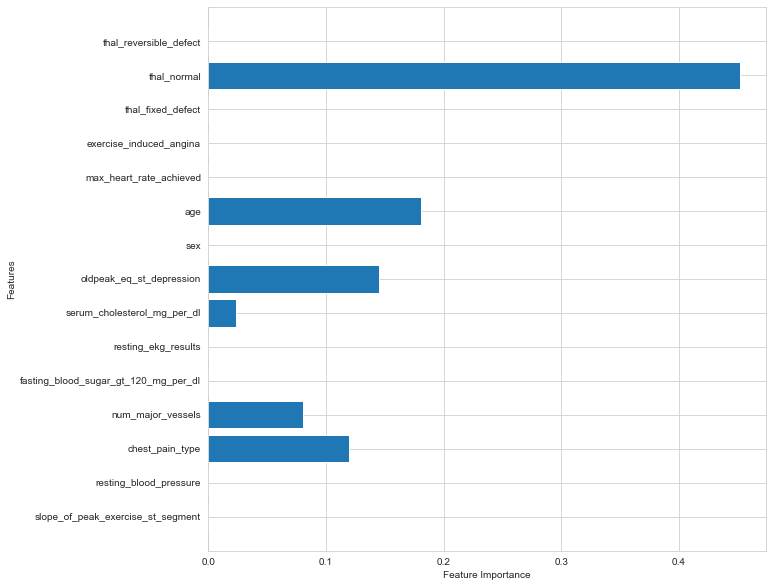

In [67]:
def plot_feature_importance(model):
    plt.figure(figsize=(10,10))
    n_features= 15
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),x)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.ylim(-1, n_features)
    
plot_feature_importance(dt)
    

In [68]:
df2.head()

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_fixed_defect,thal_normal,thal_reversible_defect,heart_disease_present
0,0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0,0
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0,0
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,0,1,0,1
3,l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,0,0,1,1
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1,0


### Making some sample predictions

In [69]:
Category= ["No you don't have heart disease" , "Yes you have heart disease"]

In [70]:
custom_data = np.array([[1,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0]])

In [71]:
custom_data_prediction_dt = dt.predict(custom_data)

C:\Users\Anirudh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [72]:
custom_data_prediction_dt

array([0], dtype=int64)

In [73]:
int(custom_data_prediction_dt)

0

In [74]:
print(Category[int(custom_data_prediction_dt)])

No you don't have heart disease


In [75]:
custom_data2= np.array([[2,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0]])

In [76]:
custom_data_prediction_dt2 = dt.predict(custom_data2)

C:\Users\Anirudh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [77]:
custom_data_prediction_dt2

array([0], dtype=int64)

#### Prediction: No heart disease

In [78]:
int(custom_data_prediction_dt2)

0

In [79]:
print(Category[int(custom_data_prediction_dt)])

No you don't have heart disease


### KNN Algorithm

In [80]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler().fit(x)
x_std = std.transform(x)

In [81]:
x_std

array([[-0.89124111, -0.19519463, -1.23477477, ..., -0.21566555,
         0.91473203, -0.83553169],
       [ 0.72919727, -1.25631978, -0.16621968, ..., -0.21566555,
         0.91473203, -0.83553169],
       [-0.89124111, -0.37204882,  0.90233541, ..., -0.21566555,
         0.91473203, -0.83553169],
       ...,
       [ 0.72919727, -0.37204882, -0.16621968, ..., -0.21566555,
        -1.09321633,  1.19684269],
       [-0.89124111, -0.43100022, -0.16621968, ..., -0.21566555,
         0.91473203, -0.83553169],
       [-0.89124111,  1.69125009, -0.16621968, ..., -0.21566555,
         0.91473203, -0.83553169]])

In [82]:
x_std[0]

array([-0.89124111, -0.19519463, -1.23477477, -0.71840267, -0.4382385 ,
        0.95384966,  1.11826909, -0.90320689,  0.67202151, -1.05396422,
        0.93248505, -0.68074565, -0.21566555,  0.91473203, -0.83553169])

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train_std, x_test_std, y_train, y_test = train_test_split(x_std,y,random_state=42, test_size=0.3, shuffle= True)

In [85]:
x_train_std.shape

(126, 15)

In [86]:
x_train_std

array([[ 0.72919727, -0.37204882, -0.16621968, ..., -0.21566555,
         0.91473203, -0.83553169],
       [-0.89124111, -0.7847086 , -0.16621968, ..., -0.21566555,
         0.91473203, -0.83553169],
       [ 0.72919727, -0.66680581,  0.90233541, ..., -0.21566555,
        -1.09321633,  1.19684269],
       ...,
       [ 0.72919727, -0.66680581, -2.30332986, ..., -0.21566555,
        -1.09321633,  1.19684269],
       [-0.89124111,  0.21746515, -0.16621968, ..., -0.21566555,
         0.91473203, -0.83553169],
       [ 0.72919727, -1.25631978,  0.90233541, ..., -0.21566555,
        -1.09321633,  1.19684269]])

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(x_train_std,y_train)


KNeighborsClassifier(n_neighbors=10)

In [88]:
prediction_knn = knn.predict(x_test_std)

In [89]:
prediction_knn

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [90]:
accuracy_knn= accuracy_score(y_test, prediction_knn)*100

In [91]:
accuracy_knn

81.48148148148148

In [92]:
k_range= range(1,26)
scores={}
scores_list=[]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train_std, y_train)
    prediction_knn= knn.predict(x_test_std)
    scores[k] = accuracy_score(y_test, prediction_knn)
    scores_list.append(accuracy_score(y_test, prediction_knn))

In [93]:
scores

{1: 0.7592592592592593,
 2: 0.7407407407407407,
 3: 0.8703703703703703,
 4: 0.7777777777777778,
 5: 0.8333333333333334,
 6: 0.7962962962962963,
 7: 0.7962962962962963,
 8: 0.7962962962962963,
 9: 0.8148148148148148,
 10: 0.8148148148148148,
 11: 0.8333333333333334,
 12: 0.8333333333333334,
 13: 0.8333333333333334,
 14: 0.8333333333333334,
 15: 0.8518518518518519,
 16: 0.8518518518518519,
 17: 0.8518518518518519,
 18: 0.8518518518518519,
 19: 0.8518518518518519,
 20: 0.8333333333333334,
 21: 0.8518518518518519,
 22: 0.8148148148148148,
 23: 0.8518518518518519,
 24: 0.8518518518518519,
 25: 0.8518518518518519}

In [94]:
scores_list

[0.7592592592592593,
 0.7407407407407407,
 0.8703703703703703,
 0.7777777777777778,
 0.8333333333333334,
 0.7962962962962963,
 0.7962962962962963,
 0.7962962962962963,
 0.8148148148148148,
 0.8148148148148148,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8518518518518519,
 0.8518518518518519,
 0.8518518518518519,
 0.8518518518518519,
 0.8518518518518519,
 0.8333333333333334,
 0.8518518518518519,
 0.8148148148148148,
 0.8518518518518519,
 0.8518518518518519,
 0.8518518518518519]

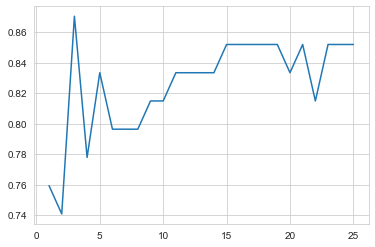

In [95]:
plt.plot(k_range,scores_list)

In [96]:
px.line(x=k_range, y=scores_list)

## Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(x_train_std,y_train)
pred_log = log_regression.predict(x_test_std)

In [98]:
accuracy_log= accuracy_score(y_test, pred_log)*100

In [99]:
accuracy_log

83.33333333333334

## SVM

In [100]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(x_train_std, y_train)

SVC()

In [101]:
pred_svc = clf.predict(x_test_std)
accuracy_svc = accuracy_score(y_test, pred_svc)*100

In [102]:
accuracy_svc

85.18518518518519

## Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [104]:
pred_gnb = gnb.predict(x_test)
accuracy_gnb = accuracy_score(y_test, pred_gnb)*100

In [105]:
accuracy_gnb

85.18518518518519

## XGBoost

In [106]:
import xgboost as xgb
xgb_cl= xgb.XGBClassifier()
xgb_cl.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [107]:
pred_xgb= xgb_cl.predict(x_test)
accuracy_xgb= accuracy_score(y_test,pred_xgb )*100

In [108]:
accuracy_xgb

83.33333333333334

In [109]:
algorithms=['Decision Tree', 'KNN', 'LR', 'SVM', 'N B', 'XGB']
scores=[accuracy_dt, accuracy_knn,accuracy_log,accuracy_svc,accuracy_gnb , accuracy_xgb]

C:\Users\Anirudh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

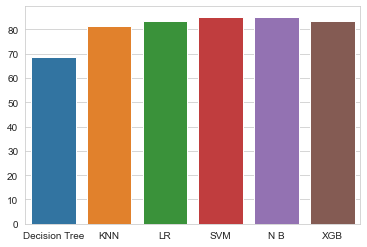

In [110]:
sns.barplot(algorithms, scores)